### Results

Includes the 5 different experiments as given in paper to observer changes due to batch normalization i.e. training stability, regularization effect, early convergence, ability to train without explicit regularization and ability to train even with sigmoid as activation function

**Graph 1**:  Single crop validation accuracy of Inception and its batch-normalized variants, vs. the number of training steps.

**Table 1**: For Inception and the batch-normalized variants, the number of training steps required to reach the maximum accuracy of Inception (57.77%), and the maximum accuracy achieved by the network.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
x1 = np.arange(100)
y1 = np.array([0.1368, 0.1509, 0.1488, 0.1693, 0.197, 0.2006, 0.2186, 0.2404, 0.2688, 0.2912, 0.3024, 0.3052, 0.3123, 0.3191, 0.3224, 0.3289, 0.3373, 0.3367, 0.3414, 0.3492, 0.3574, 0.3511, 0.359, 0.3657, 0.372, 0.38, 0.3815, 0.3886, 0.3865, 0.3767, 0.4007, 0.3875, 0.4073, 0.4145, 0.4052, 0.3987, 0.4295, 0.4154, 0.4389, 0.4423, 0.4368, 0.4441, 0.4584, 0.4553, 0.4475, 0.4712, 0.4522, 0.474, 0.4813, 0.4718, 0.4499, 0.4641, 0.5014, 0.4925, 0.477, 0.4988, 0.511, 0.4983, 0.5122, 0.517, 0.5186, 0.494, 0.517, 0.5165, 0.5226, 0.5343, 0.5216, 0.5232, 0.5174, 0.5384, 0.5388, 0.5367, 0.545, 0.544, 0.5423, 0.5262, 0.5499, 0.5307, 0.5441, 0.5524, 0.5414, 0.551, 0.5589, 0.5587, 0.5627, 0.5656, 0.5602, 0.5618, 0.5706, 0.5677, 0.5644, 0.5625, 0.5778, 0.5699, 0.5695, 0.5544, 0.5416, 0.5745, 0.5767, 0.5777])  # unchanged
x2 = np.arange(13)
y2 = np.array([0.3507, 0.3728, 0.4238, 0.4674, 0.4899, 0.5078, 0.5294, 0.519, 0.5413, 0.5478, 0.579, 0.5587, 0.5947])
x3 = np.arange(7)
y3 = np.array([0.4253, 0.502, 0.5499, 0.5035, 0.4572, 0.5633, 0.5808])
x4 = np.arange(4)
y4 = np.array([0.4215, 0.5441, 0.5746, 0.6287])
x5 = np.arange(30)
y5 = np.array([0.3051, 0.3172, 0.3607, 0.2957, 0.3349, 0.2971, 0.3577, 0.4636, 0.3806, 0.4308, 0.4134, 0.3741, 0.4825, 0.4915, 0.3574, 0.5049, 0.4881, 0.4156, 0.2985, 0.5168, 0.4396, 0.528, 0.5471, 0.5299, 0.4116, 0.3163, 0.4589, 0.5249, 0.4779, 0.5592])

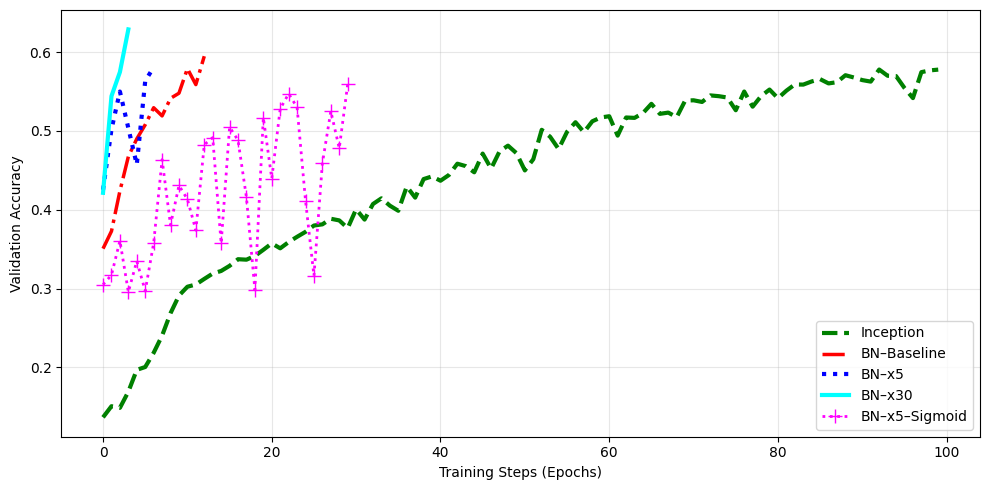

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))

# Find the maximum x length among all curves
max_len = max(len(x1), len(x2), len(x3), len(x4), len(x5))

def pad(x, y, max_len):
    pad_len = max_len - len(x)
    x_pad = np.concatenate([x, np.full(pad_len, np.nan)])
    y_pad = np.concatenate([y, np.full(pad_len, np.nan)])
    return x_pad, y_pad

# Pad all curves to the same length
x1p, y1p = pad(x1, y1, max_len)
x2p, y2p = pad(x2, y2, max_len)
x3p, y3p = pad(x3, y3, max_len)
x4p, y4p = pad(x4, y4, max_len)
x5p, y5p = pad(x5, y5, max_len)

# Plot
plt.plot(x1p, y1p, '--', linewidth=3, color='green', label='Inception')
plt.plot(x2p, y2p, '-.', linewidth=2.5, color='red', label='BN–Baseline')
plt.plot(x3p, y3p, ':', linewidth=3, color='blue', label='BN–x5')
plt.plot(x4p, y4p, '-', linewidth=3, color='cyan', label='BN–x30')
plt.plot(x5p, y5p, ':', linewidth=2, color='magenta', marker='+', markersize=10, label='BN–x5–Sigmoid')

plt.xlabel("Training Steps (Epochs)")
plt.ylabel("Validation Accuracy")
plt.grid(True, alpha=0.3)
plt.legend(loc='lower right')

plt.tight_layout()
plt.savefig("temp.png")
plt.show()


In [3]:
import pandas as pd

data = {
    "Model": ["Inception", "BN-Baseline", "BN-x5", "BN-x30", "BN-x5-Sigmoid"],
    "Epochs to 57.77%": [99, 13, 7, 4, None],
    "Max Accuracy (%)": [57.77, 68.47, 68, 73, 55.92],
}

df = pd.DataFrame(data)


In [4]:
df

,Model,Epochs to 57.77%,Max Accuracy (%)
0,Inception,99.0,57.77
1,BN-Baseline,13.0,68.47
2,BN-x5,7.0,68.00
3,BN-x30,4.0,73.00
4,BN-x5-Sigmoid,NaN,55.92
